In [ ]:
import pandas as pd
df=pd.read_pickle("/content/2_CarPricesData.pkl")
df

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
...,...,...,...,...,...,...,...,...
1431,69.0,20544,1025.0,86,1,1300.0,3,7500
1432,72.0,19000,1015.0,86,0,1300.0,3,10845
1433,71.0,17016,1015.0,86,0,1300.0,3,8500
1434,70.0,16916,1015.0,86,1,1300.0,3,7250


In [ ]:
df.isnull().sum()

,0
Age,0
KM,0
Weight,0
HP,0
MetColor,0
CC,0
Doors,0
Price,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[['Age', 'KM', 'Weight', 'HP', 'CC']] = sc.fit_transform(df[['Age', 'KM', 'Weight', 'HP', 'CC']])
df

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,0.278481,0.193355,0.515625,0.170732,1,1.000000,3,13500
1,0.278481,0.300149,0.515625,0.170732,1,1.000000,3,13750
2,0.291139,0.171647,0.515625,0.170732,1,1.000000,3,13950
3,0.316456,0.197528,0.515625,0.170732,0,1.000000,3,14950
4,0.367089,0.158433,0.531250,0.170732,0,1.000000,3,13750
...,...,...,...,...,...,...,...,...
1431,0.860759,0.084539,0.078125,0.138211,1,0.000000,3,7500
1432,0.898734,0.078186,0.046875,0.138211,0,0.000000,3,10845
1433,0.886076,0.070021,0.046875,0.138211,0,0.000000,3,8500
1434,0.873418,0.069609,0.046875,0.138211,1,0.000000,3,7250


In [ ]:
X=df.iloc[:,:-1]
y=df['Price']

In [ ]:
X.shape

(1435, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1148, 7)
(287, 7)


In [ ]:
from keras import Sequential
from keras.layers import Dense
from keras. callbacks import EarlyStopping,ModelCheckpoint

model = Sequential()
model.add(Dense(units=16,input_dim=7,kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(45, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(14, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='he_uniform', activation='relu'))

model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 45)             │         1,485 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 14)             │           434 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,566 (29.55 KB)

 Trainable params: 7,566 (29.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

model.fit(X_train, y_train, epochs=30, batch_size=20, verbose=2,validation_split=0.2)


Epoch 1/30
46/46 - 7s - 143ms/step - loss: 130102296.0000 - mse: 130102296.0000 - val_loss: 113373664.0000 - val_mse: 113373664.0000
Epoch 2/30
46/46 - 2s - 36ms/step - loss: 113984200.0000 - mse: 113984200.0000 - val_loss: 78157840.0000 - val_mse: 78157840.0000
Epoch 3/30
46/46 - 1s - 14ms/step - loss: 51054800.0000 - mse: 51054800.0000 - val_loss: 14312341.0000 - val_mse: 14312341.0000
Epoch 4/30
46/46 - 0s - 7ms/step - loss: 15785706.0000 - mse: 15785706.0000 - val_loss: 12929860.0000 - val_mse: 12929860.0000
Epoch 5/30
46/46 - 1s - 13ms/step - loss: 15035403.0000 - mse: 15035403.0000 - val_loss: 12692792.0000 - val_mse: 12692792.0000
Epoch 6/30
46/46 - 1s - 15ms/step - loss: 14263389.0000 - mse: 14263389.0000 - val_loss: 12018639.0000 - val_mse: 12018639.0000
Epoch 7/30
46/46 - 1s - 18ms/step - loss: 13804962.0000 - mse: 13804962.0000 - val_loss: 12113205.0000 - val_mse: 12113205.0000
Epoch 8/30
46/46 - 1s - 17ms/step - loss: 13207743.0000 - mse: 13207743.0000 - val_loss: 11909059.

# **Early stopping**

In [ ]:
from keras import Sequential
from keras.layers import Dense
from keras. callbacks import EarlyStopping,ModelCheckpoint

model2= Sequential()
model2.add(Dense(units=16,input_dim=7,kernel_initializer='random_uniform', activation='relu'))
model2.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
model2.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model2.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
model2.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))


model2.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

early_stop=EarlyStopping(monitor='val_loss',
                        patience=5,
                        restore_best_weights=True,
                        verbose=1)

checkpoint=ModelCheckpoint("best_model.h5",monitor='val_loss',verbose=1,save_best_only=True,mode='auto')

In [ ]:

model2.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1,validation_split=0.2,callbacks=[early_stop, checkpoint, lr_reduce],)

NameError: name 'lr_reduce' is not defined

In [ ]:
from keras import Sequential
from keras.layers import Dense
from keras. callbacks import EarlyStopping,ModelCheckpoint

model3= Sequential()
model3.add(Dense(units=16,input_dim=7,kernel_initializer='random_uniform', activation='relu'))
model3.add(Dense(30, kernel_initializer='he_uniform', activation='relu'))
model3.add(Dense(40, kernel_initializer='he_uniform', activation='relu'))
model3.add(Dense(60, kernel_initializer='he_uniform', activation='relu'))
model3.add(Dense(80, kernel_initializer='he_uniform', activation='relu'))
model3.add(Dense(60, kernel_initializer='he_uniform', activation='relu'))
model3.add(Dense(40, kernel_initializer='he_uniform', activation='relu'))
model3.add(Dense(30, kernel_initializer='he_uniform', activation='relu'))
model3.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))

model3.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=['mse'])

early_stop=EarlyStopping(monitor='val_loss',
                        patience=4,
                        restore_best_weights=True,
                        verbose=1)

checkpoint=ModelCheckpoint("model3.keras",monitor='val_loss',verbose=1,save_best_only=True,mode='auto')

In [ ]:

model3.fit(
    X_train, y_train,
    epochs=100,
    batch_size=40,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 129544560.0000 - mse: 129544560.0000
Epoch 1: val_loss improved from inf to 112757760.00000, saving model to model3.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 129572024.0000 - mse: 129572024.0000 - val_loss: 112757760.0000 - val_mse: 112757760.0000
Epoch 2/100
14/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119306312.0000 - mse: 119306312.0000
Epoch 2: val_loss improved from 112757760.00000 to 47149408.00000, saving model to model3.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 114327824.0000 - mse: 114327824.0000 - val_loss: 47149408.0000 - val_mse: 47149408.0000
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34220392.0000 - mse: 34220392.0000
Epoch 3: val_loss improved from 47149408.00000 to 13043527.00000, saving model to model3.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 33802244.0000 - mse: 33802244.0000 - val_loss: 13043527.0000 - val_mse: 13043527.0000
Epoch 4/100
15/23 ━━━━━━━━━━

In [ ]:
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model4 = Sequential()
model4.add(Dense(units=16, input_dim=7, kernel_initializer='random_uniform', activation='relu'))
model4.add(Dense(30, kernel_initializer='he_uniform', activation='relu'))
model4.add(Dense(40, kernel_initializer='he_uniform', activation='relu'))
model4.add(Dense(60, kernel_initializer='he_uniform', activation='relu'))
model4.add(Dense(70, kernel_initializer='he_uniform', activation='relu'))
model4.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
model4.add(Dense(70, kernel_initializer='he_uniform', activation='relu'))
model4.add(Dense(60, kernel_initializer='he_uniform', activation='relu'))
model4.add(Dense(40, kernel_initializer='he_uniform', activation='relu'))
model4.add(Dense(30, kernel_initializer='he_uniform', activation='relu'))
model4.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))

model4.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:


model4.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("model4.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')


In [ ]:
history=model4.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 126263592.0000 - mse: 126263592.0000
Epoch 1: val_loss improved from inf to 48030968.00000, saving model to model4.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - loss: 126031056.0000 - mse: 126031056.0000 - val_loss: 48030968.0000 - val_mse: 48030968.0000
Epoch 2/50
22/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33222888.0000 - mse: 33222888.0000   
Epoch 2: val_loss improved from 48030968.00000 to 14660280.00000, saving model to model4.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 29893724.0000 - mse: 29893724.0000 - val_loss: 14660280.0000 - val_mse: 14660280.0000
Epoch 3/50
22/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15460921.0000 - mse: 15460921.0000  
Epoch 3: val_loss improved from 14660280.00000 to 12500523.00000, saving model to model4.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15396325.0000 - mse: 15396325.0000 - val_loss: 12500523.0000 - val_mse: 12500523.0000
Epoch 4/50
21/29 ━━━━━━━━━━━━━━━━━

In [ ]:
model4.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 60)             │         2,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 70)             │         4,270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │         7,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 70)             │         7,070 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 60)             │         4,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,444 (243.93 KB)

 Trainable params: 31,221 (121.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,223 (121.97 KB)

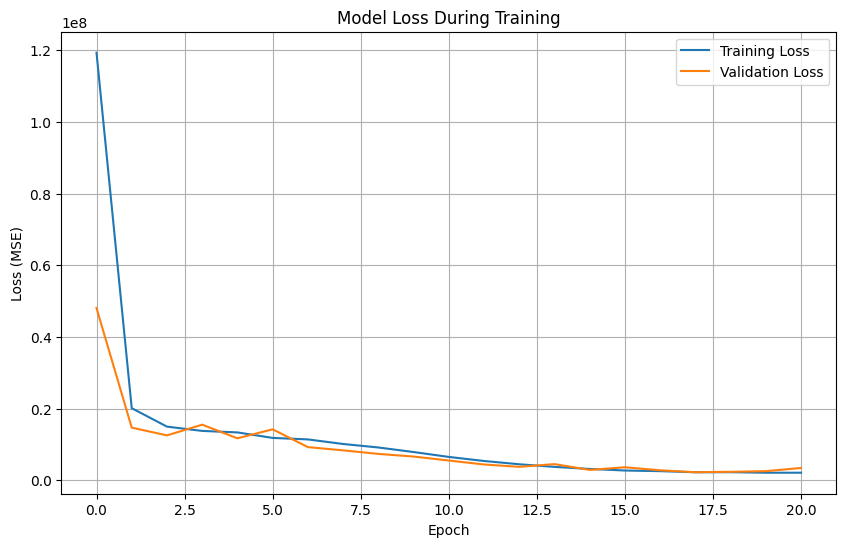

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# **Dropout Layers**

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

model5 = Sequential()
model5.add(Dense(units=16, input_dim=7, kernel_initializer='random_uniform', activation='relu'))
model5.add(Dense(30, kernel_initializer='he_uniform', activation='relu'))
model5.add(Dense(40, kernel_initializer='he_uniform', activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(60, kernel_initializer='he_uniform', activation='relu'))
model5.add(Dense(70, kernel_initializer='he_uniform', activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(70, kernel_initializer='he_uniform', activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(60, kernel_initializer='he_uniform', activation='relu'))
model5.add(Dense(40, kernel_initializer='he_uniform', activation='relu'))
model5.add(Dense(30, kernel_initializer='he_uniform', activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))

model5.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:


model5.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("model5.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')


In [ ]:
history=model5.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 131971808.0000 - mse: 131971808.0000
Epoch 1: val_loss improved from inf to 41210612.00000, saving model to model5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - loss: 131570496.0000 - mse: 131570496.0000 - val_loss: 41210612.0000 - val_mse: 41210612.0000
Epoch 2/50
19/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27504164.0000 - mse: 27504164.0000   
Epoch 2: val_loss improved from 41210612.00000 to 12822289.00000, saving model to model5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 26797684.0000 - mse: 26797684.0000 - val_loss: 12822289.0000 - val_mse: 12822289.0000
Epoch 3/50
19/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26151520.0000 - mse: 26151520.0000 
Epoch 3: val_loss did not improve from 12822289.00000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26079052.0000 - mse: 26079052.0000 - val_loss: 12852173.0000 - val_mse: 12852173.0000
Epoch 4/50
18/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20754146.0000 - ms

In [ ]:
model5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 60)             │         2,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 70)             │         4,270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │         7,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 70)             │         7,070 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 60)             │         4,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,444 (243.93 KB)

 Trainable params: 31,221 (121.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,223 (121.97 KB)